# Step 1: Install and import modules

In [86]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [87]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 2.2.0, 2.2.0+cpu, 2.2.0+cu118, 2.2.0+cu121, 2.2.1, 2.2.1+cpu, 2.2.1+cu118, 2.2.1+cu121, 2.2.2, 2.2.2+cpu, 2.2.2+cu118, 2.2.2+cu121, 2.3.0, 2.3.0+cpu, 2.3.0+cu118, 2.3.0+cu121)
ERROR: No matching distribution found for torch==1.7.1+cpu


Defaulting to user installation because normal site-packages is not writeable


In [88]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Image loading and text recognition using EasyOCR

In [89]:
# im_1_path = 'output_images/image1/image1_Cei.jpeg'
im_2_path = 'output_images/image2/image2_Cei_binarized.jpeg'
im_3_path = 'output_images/image3/image3_Cei.jpeg'
im_4_path = 'output_images/image4/image4_Cei.jpeg'
im_5_path = 'output_images/image5/image5_Cei.jpeg'

In [90]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

# Step 3: Overlay recognized text on image using OpenCV

In [102]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    clear_image = np.zeros(img.shape)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    plt.figure()
    f, axarr = plt.subplots(1,3, figsize=(20, 20)) 
    axarr[0].imshow(img)
    axarr[0].axis('off')
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            top_right = (int(top_right[0]), int(top_right[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            bottom_left = (int(bottom_left[0]), int(bottom_left[1]))

            # # create a rectangle for bbox display
            cv2.rectangle(img=clear_image, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=1)

            # put recognized text
            cv2.putText(img=clear_image, text=text, org=((top_left[0]+bottom_left[0])//2, (top_left[1]+bottom_left[1])//2), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=max(0.3, (((top_right[0] - top_left[0]))//(17*len(text)))), color=(255, 0, 0), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    axarr[1].axis('off')
    axarr[2].imshow(clear_image)
    axarr[2].axis('off')
    
    # plt.savefig(f'./output_images/{save_name}_overlay.jpg', bbox_inches='tight')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: EXTENDED (Probability: 0.83)
Detected text: OFFER (Probability: 1.00)


<Figure size 640x480 with 0 Axes>

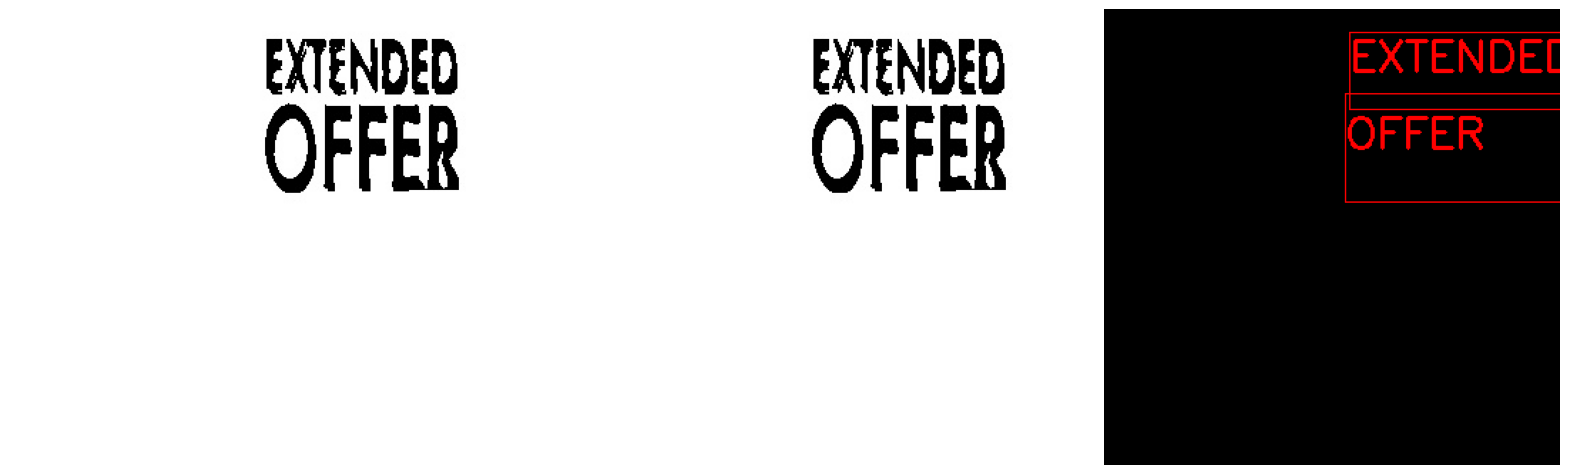

In [103]:
image_name, format = im_2_path.split('/')[-2], im_2_path.split('/')[-1].split('.')[1]
im_2_path = 'output_images/image2/image2_Cei_binarized.jpeg'

overlay_ocr_text(im_2_path, f'output_images/{image_name}/{image_name}_detection.{format}')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: SLEEPER (Probability: 0.98)


<Figure size 640x480 with 0 Axes>

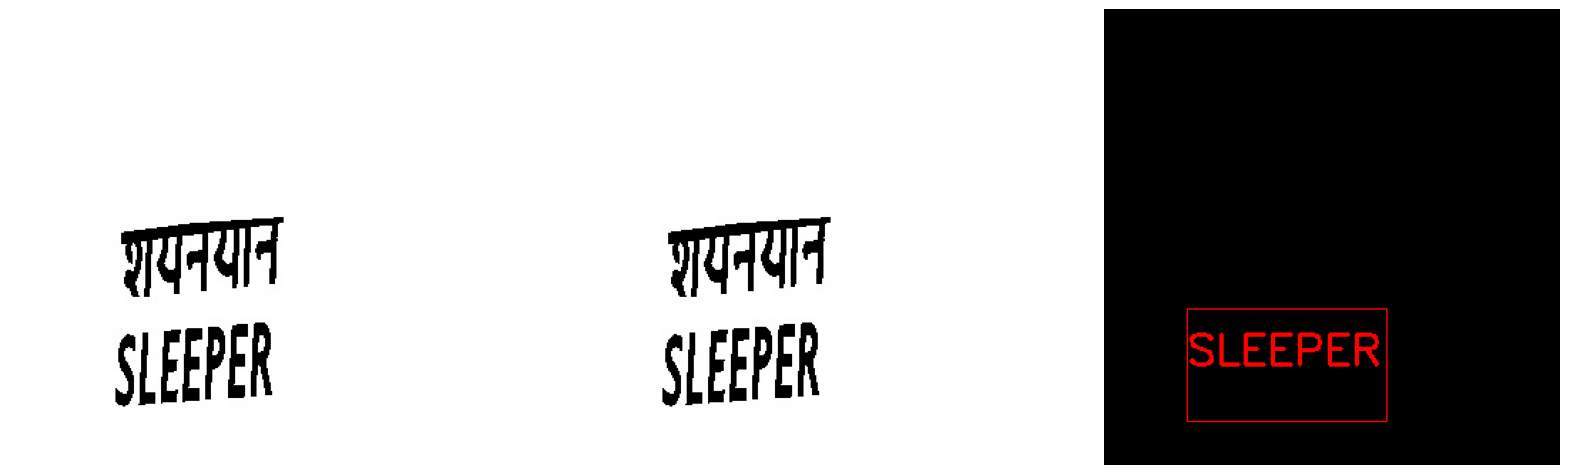

In [104]:
image_name, format = im_3_path.split('/')[-2], im_3_path.split('/')[-1].split('.')[1]
im_3_path = 'output_images/image3/image3_Cei_binarized.jpeg'

overlay_ocr_text(im_3_path, f'output_images/{image_name}/{image_name}_detection.{format}')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: NEW DELHL (Probability: 0.55)
Detected text: 500 km (Probability: 0.98)
Detected text: BOMBAY (Probability: 1.00)
Detected text: 800 km (Probability: 0.94)
Detected text: B'LORE (Probability: 0.99)
Detected text: 1200km (Probability: 0.97)


<Figure size 640x480 with 0 Axes>

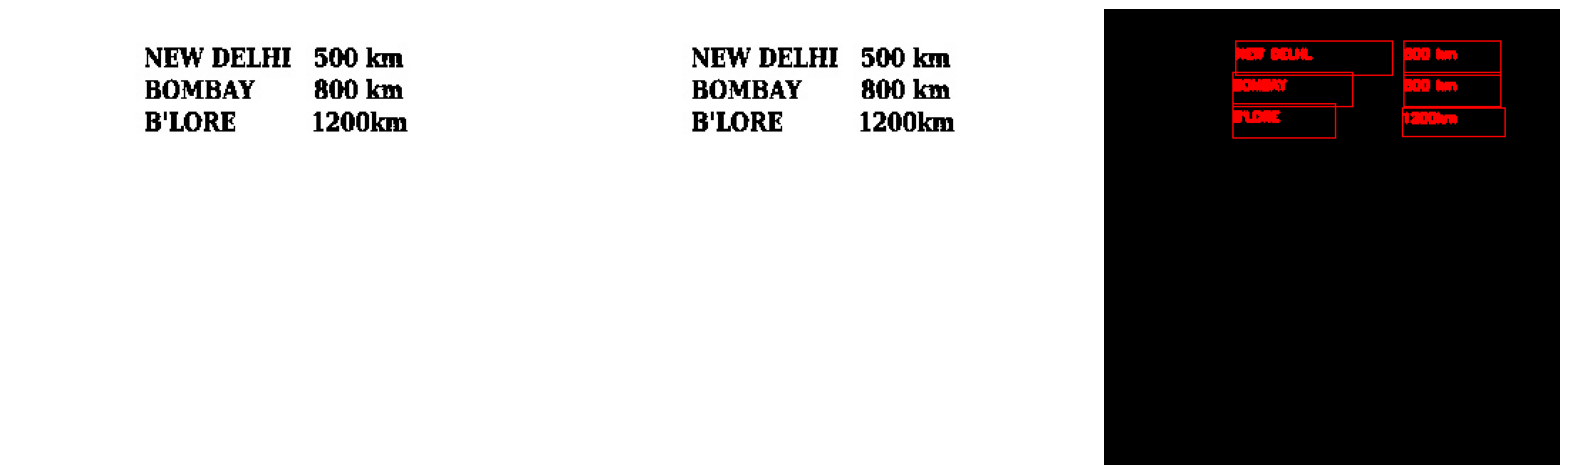

In [105]:
image_name, format = im_4_path.split('/')[-2], im_4_path.split('/')[-1].split('.')[1]
im_4_path = 'output_images/image4/image4_Cei_binarized.jpeg'

overlay_ocr_text(im_4_path, f'output_images/{image_name}/{image_name}_detection.{format}')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Detected text: School" (Probability: 0.66)


<Figure size 640x480 with 0 Axes>

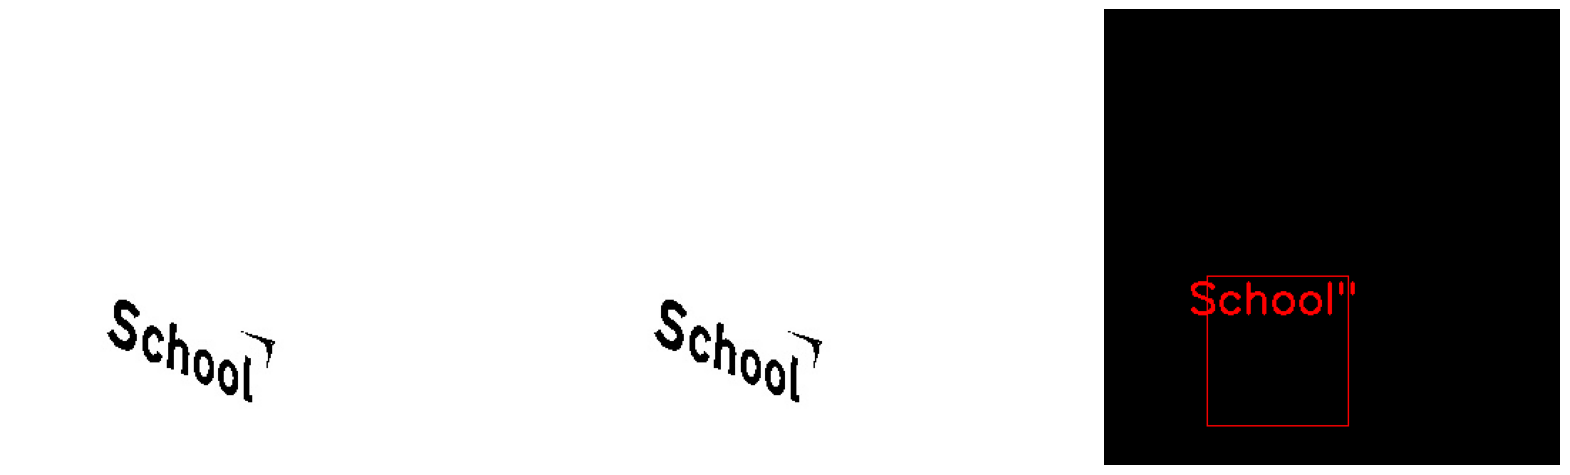

In [106]:
image_name, format = im_5_path.split('/')[-2], im_5_path.split('/')[-1].split('.')[1]
im_5_path = 'output_images/image5/image5_Cei_binarized.jpeg'

overlay_ocr_text(im_5_path, f'output_images/{image_name}/{image_name}_detection.{format}')